Example lactam analysis using a single cores on a very large dataset.

In [7]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition
import pandas as pd
from rdkit.Chem import PandasTools

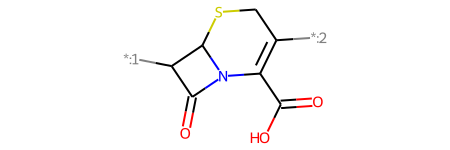

In [8]:
core = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:2])CS2')
core

To use RGroupDecomposition:
  
  1. construct the class on the core rg = RGroupDecomposition(core)
  2. Call rg.Add( mol ) on the molecules.  If this returns -1, the molecule is not
     compatible with the core
  3. After all molecules are added, call rg.Process() to complete the rgroup
     decomposition.

In [9]:
rg = RGroupDecomposition(core)

mols = []
count = 0
for line in open("compounds.txt"):
    sm = line.split()[-1]
    m = Chem.MolFromSmiles(sm)
    if m:
        count += 1
        idx = rg.Add(m)
rg.Process()
print ("Added %s to RGroup Decomposition out of %s"%(idx, count))

RDKit ERROR: [16:59:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Invariant Violation
RDKit ERROR: Duplicate labels in rgroup core!
RDKit ERROR: Violation occurred on line 45 in file /home/packages/rdkit/Code/GraphMol/RGroupDecomposition/RGroupUtils.cpp
RDKit ERROR: Failed Expression: atoms.find(rlabel) == atoms.end()
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:01:00] SMILES Parse Error: syntax error while parsing: CANONICAL_SMILES
RDKit ERROR: [17:01:00] SMILES Parse Error: Failed parsing SMILES 'CANONICAL_SMILES' for input: 'CANONICAL_SMILES'
RDKit WARNING: [17:01:06] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:06] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:06] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:06] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:06] WARNING: not removing hydrogen atom with dummy atom neighbors


RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNIN

Added 1194 to RGroup Decomposition out of 4340


RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [17:01:07] WARNIN

It is useful to disable logging here.  When making RGroup renderings there 
are a lot of sanitization warnings.

In [10]:
from rdkit import RDLogger
RDLogger.DisableLog("rdApp.*")

The RGroupDecomposition code is quite compatible with the python pandas integration.
Calling rg.GetRGroupsAsColumns() can be sent directly into a pandas table.

**n.b.** You need to call PandasTools.ChangeMoleculeRendering(frame) to allow the molecules
to be rendered properly.

In [13]:
frame = pd.DataFrame(rg.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(frame)

In [12]:
Just show the fir

SyntaxError: invalid syntax (<ipython-input-12-9b79581a0e52>, line 1)

In [14]:
f2 = pd.DataFrame(frame.head())
PandasTools.ChangeMoleculeRendering(f2)
f2

RDKit WARNING: [17:01:58] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [17:01:58] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [17:01:58] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [17:01:58] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [17:01:58] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [17:01:58] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [17:01:58] WARNING: bond found with stereo spec but no stereo atoms
RDKit WARNING: [17:01:58] WARNING: bond found with stereo spec but no stereo atoms


,Core,R1,R2,R3,R4,R5
0,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
1,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
2,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
3,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
4,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
